In [1]:
from spec_utils import *
import librosa
from glob import glob

In [14]:
audio, sr = librosa.load("/Users/meilong/Downloads/blk411_44013.31484420_7_1_8_44_44.wav", sr = 32000)

In [15]:
spec_cal_constant_q = SpecCalConstantQ(sr, hop_length = 80, min_frequency=10)

In [16]:
sr

32000

In [17]:
spec_cal_constant_q.bins_per_octave

25

In [5]:
spec_cal_constant_q.min_bins_per_octave

1

In [6]:
spec_cal_constant_q.max_bins_per_octave

45

In [7]:
spec = spec_cal_constant_q( audio )

In [27]:
spec_cal_constant_q.bins_per_octave = 43

In [18]:
spec_1 = spec_cal_constant_q( audio )
spec_1.shape

(256, 9431, 3)

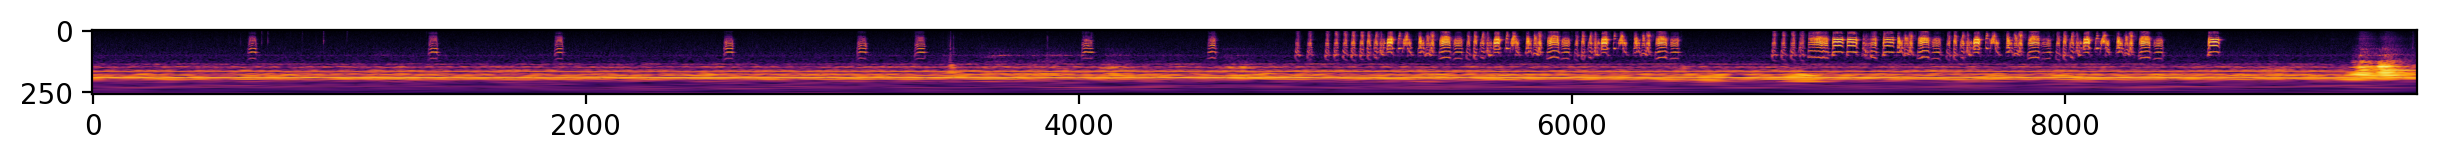

In [19]:
plt.figure(figsize=(15,10), dpi =200)
plt.imshow(spec_1)